<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
#IMPORTING EVERYTHING FROM THE TOP OF THE FILE TO AVOID MISSING THINGS (which happened a lot hehe). Ordered in alphabetic order (sort of).

import itertools

import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib.image as mpimg

import numpy as np

import pandas as pd

import pydotplus

import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn import tree
from sklearn import svm

from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score



%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-07-02 14:40:01--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-07-02 14:40:01 (12.8 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes

##########-------------REMOVE THE "HASH" SYMBOLS TO INSTALL SEABORN IF NEEDED----------------

#########!conda install -c anaconda seaborn -y

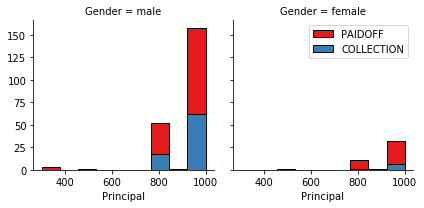

In [8]:


bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

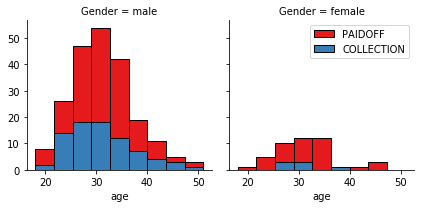

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

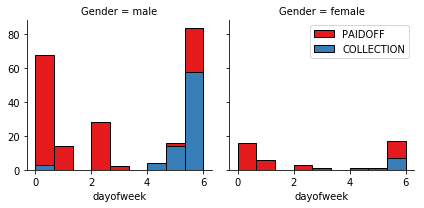

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [19]:
#Copying X to X2 to be used on the Decision Tree graph to keep the "more natural" values of Age, etc....

X2 = X

X = preprocessing.StandardScaler().fit(X).transform(X)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [20]:
# First I will rename the titles on the Table to fix some mispelling errors and standarize the capial letters... sorry :P

X = pd.DataFrame (X)
X.columns = ["Principal", "Terms", "Age", "Gender", "Weekend", "Bachelor", "High School or Below", "College"]
X.head()

,Principal,Terms,Age,Gender,Weekend,Bachelor,High School or Below,College
0,0.515785,0.920718,2.331526,-0.420560,-1.205778,-0.381701,1.136394,-0.869681
1,0.515785,0.920718,0.341701,2.377782,-1.205778,2.619854,-0.879977,-0.869681
2,0.515785,-0.959111,-0.653211,-0.420560,-1.205778,-0.381701,-0.879977,1.149847
3,0.515785,0.920718,-0.487392,2.377782,0.829340,-0.381701,-0.879977,1.149847
4,0.515785,0.920718,-0.321573,-0.420560,0.829340,-0.381701,-0.879977,1.149847


In [21]:
#Let's create the test and train sets as suggested above. Let's do 80%-20%.

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


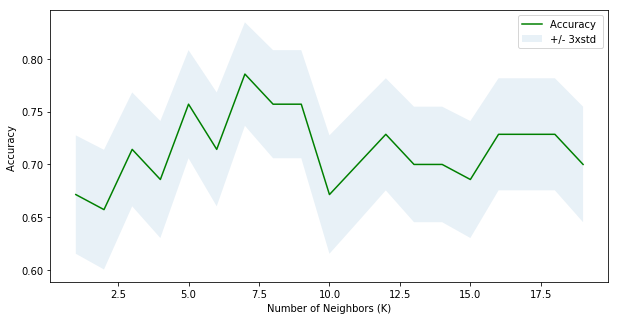

The best accuracy was  0.7857142857142857 with k = 7


In [22]:
#Here we will try different values of K to see which one is the one that gives the best result, let's go crazy and do 20.

Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)  
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
#Let's graph the results
plt.figure(figsize=(10,5))
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
#plt.tight_layout()
plt.show()
print( "The best accuracy was ", mean_acc.max(), "with k =", mean_acc.argmax()+1) 

# Decision Tree

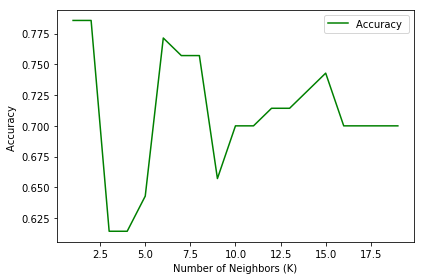

The best accuracy was  0.7857142857142857 with depth = 1


In [23]:
##########-------------REMOVE THE "HASH" SYMBOLS TO INSTALL THE "TREE GRAPH PACKAGES" IF NEEDED----------------
#################!conda install -c conda-forge pydotplus -y
#################!conda install -c conda-forge python-graphviz -y

X2_train, X2_test = train_test_split( X2, test_size=0.2, random_state=4)

#I will do the same as with K neighbours, iterate through different values of "max_depth" to see which one gives the most accurate value.
Ts = 20
mean_accT = np.zeros((Ts-1))
for n in range(1,Ts):
    
    #Train Model and Predict  
    loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    loanTree.fit(X2_train,y_train)
    predTree = loanTree.predict(X2_test)
    mean_accT [n-1] = metrics.accuracy_score(y_test, predTree)
    

#Let's graph the results
plt.plot(range(1,Ts),mean_accT,'g')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was ", mean_accT.max(), "with depth =", mean_accT.argmax()+1) 

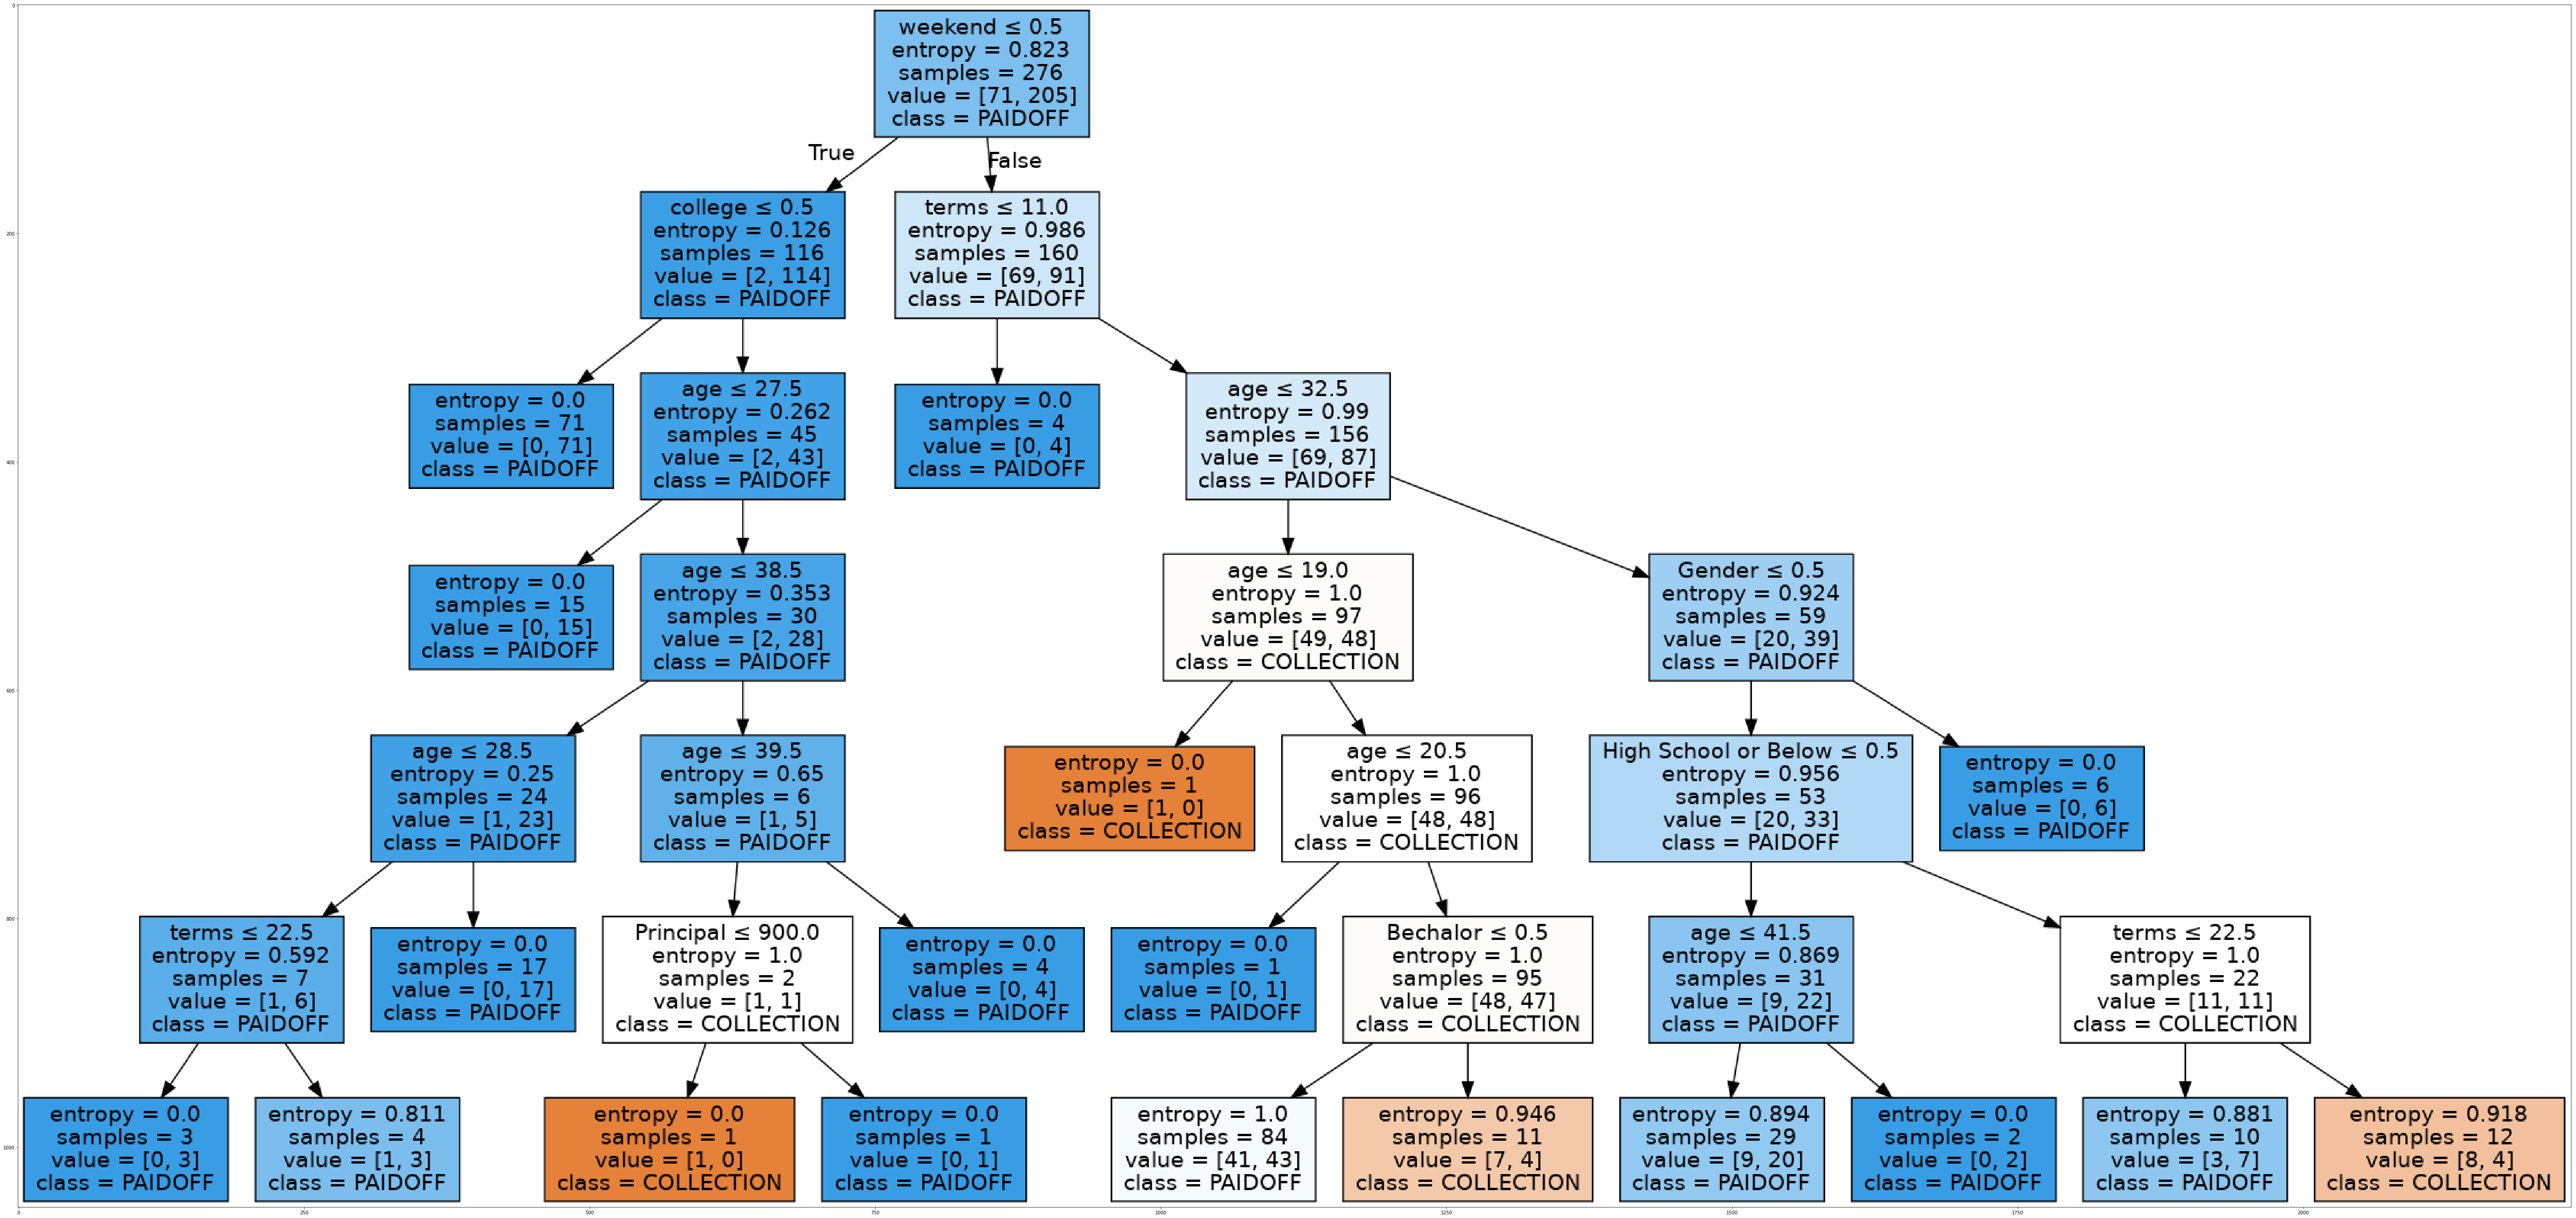

In [24]:
#----------The highest accuracy happens at both levels 1 and 2 of depth, like mentioned before seems like the weekend is the biggest predictor.
#----------For plotting purposes I will graph with depth = 6, you can change that value to see other tree graphs.

loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
loanTree.fit(X2_train,y_train)
predTree = loanTree.predict(X2_test)

dot_data = StringIO()
filename = "loantree.png"
featureNames = X2.columns[0:8]
targetNames = df['loan_status'].unique().tolist()
out=tree.export_graphviz(loanTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Support Vector Machine

In [25]:
#First I am creating a copy of the y (objective) values to transform them into numerical values to be able to process them trhough SVM
ySVM_train = y_train
ySVM_test = y_test

le_process = preprocessing.LabelEncoder()
le_process.fit(['PAIDOFF','COLLECTION'])
ySVM_test = le_process.transform(ySVM_test) 
ySVM_train = le_process.transform(ySVM_train)

In [26]:
#Here I will fit the model

clf = svm.SVC(kernel='rbf')
clf.fit(X_train, ySVM_train)
yhat = clf.predict(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.36      0.27      0.31        15
           1       0.81      0.87      0.84        55

   micro avg       0.74      0.74      0.74        70
   macro avg       0.59      0.57      0.57        70
weighted avg       0.72      0.74      0.73        70

Confusion matrix, without normalization
[[ 4 11]
 [ 7 48]]


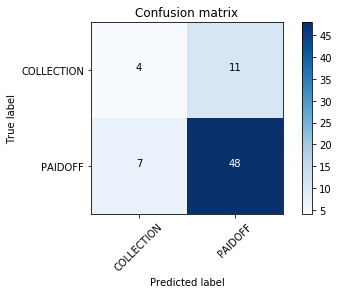

In [27]:
#This is the confussion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # Compute confusion matrix
cnf_matrix = confusion_matrix(ySVM_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(ySVM_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COLLECTION','PAIDOFF'],normalize= False,  title='Confusion matrix')

In [28]:
#Getting the f1 score

f1_score(ySVM_test, yhat, average='weighted') 

0.7275882012724117

# Logistic Regression

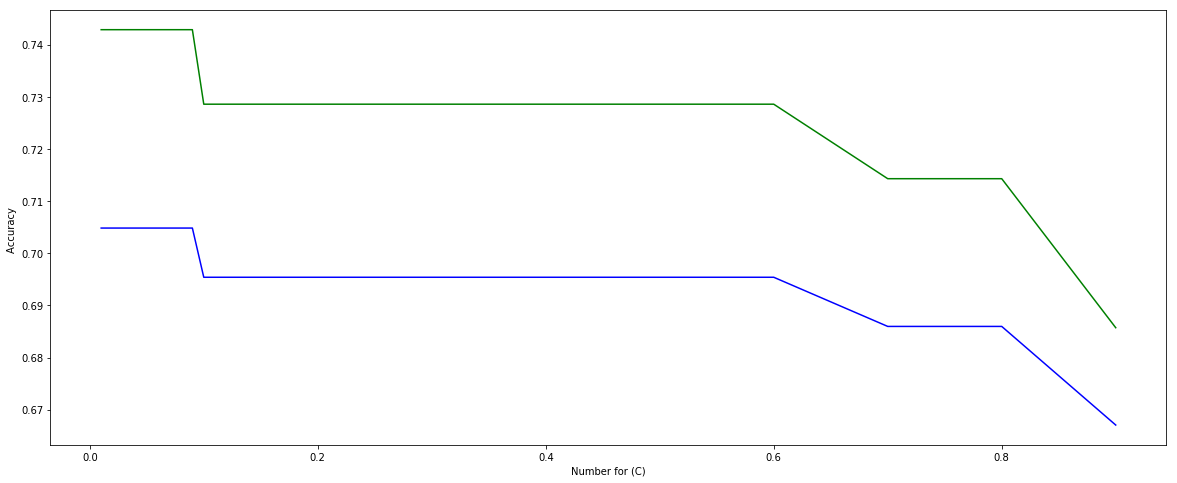

The best accuracy was  0.7428571428571429 with C = 0.01


In [29]:
#Fitting the model and getting its prediction. Found that a value of 1 for "C" gave the best results.
# Trying for different values of C to find the best one.
Cvalues = [0.01, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Clen = len (Cvalues)
mean_accLR = np.zeros((Clen))
difer = np.zeros ((Clen))

for n in range(0,Clen):
    
    #Train Model and Predict  
    
    LR = LogisticRegression(C=Cvalues[n], solver='liblinear').fit(X_train,ySVM_train)
    yhatLR = LR.predict(X_test)
    yhatLRtrain = LR.predict(X_train)
    mean_accLR [n-1] = jaccard_similarity_score(ySVM_test, yhatLR)
    difer [n-1] = f1_score(ySVM_test, yhatLR,  average='weighted')
    
    
   
    

#Let's graph the results
plt.figure(figsize=(20,8))
plt.plot(Cvalues,mean_accLR,'g')
plt.plot(Cvalues,difer,'b')
plt.ylabel('Accuracy ')
plt.xlabel('Number for (C)')
#plt.tight_layout()
plt.show()
list1 = mean_accLR.tolist()
index = list1.index (mean_accLR.max())

print( "The best accuracy was ", mean_accLR.max(), "with C =", Cvalues[index] )

              precision    recall  f1-score   support

           0       0.22      0.13      0.17        15
           1       0.79      0.87      0.83        55

   micro avg       0.71      0.71      0.71        70
   macro avg       0.50      0.50      0.50        70
weighted avg       0.67      0.71      0.69        70

Confusion matrix, without normalization
[[ 2 13]
 [ 7 48]]


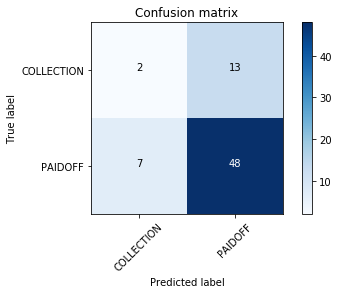

In [30]:
#---------CONFUSION MATRIX

cnf_matrix = confusion_matrix(ySVM_test, yhatLR, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(ySVM_test, yhatLR))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COLLECTION','PAIDOFF'],normalize= False,  title='Confusion matrix')


# Model Evaluation using Test set

First, download and load the test set:

In [31]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-07-02 14:40:16--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-07-02 14:40:16 (199 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation

In [32]:
test_df = pd.read_csv('loan_test.csv')

In [33]:
#First we treat the TEST DATA the same as our training data to be able to process it.

test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df[['Principal','terms','age','Gender','education']].head()

Feat = test_df[['Principal','terms','age','Gender','weekend']]
Feat = pd.concat([Feat,pd.get_dummies(test_df['education'])], axis=1)
Feat.drop(['Master or Above'], axis = 1,inplace=True)

FeatureTest = Feat
FeatureTest = preprocessing.StandardScaler().fit(FeatureTest).transform(FeatureTest)


test_y = test_df['loan_status'].values


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:15: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


## K Neighbors

In [34]:
# Just to make sure I use the best fit value for the model I am running it again here.
neigh = KNeighborsClassifier(n_neighbors = 7).fit(X_train,y_train)

#Now the prediction and the accuracy.

yhatKmeans=neigh.predict(FeatureTest)
Kmeans = metrics.accuracy_score(test_y, yhatKmeans)
Kmeans

0.6666666666666666

## Tree

In [35]:
# Just to make sure I use the best fit value for the model I am running it again here.
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 2)
loanTree.fit(X2_train,y_train)

#Now the prediction and the accuracy.

predTreeTest = loanTree.predict(FeatureTest)
Tree = metrics.accuracy_score(test_y, predTreeTest)
Tree

0.7407407407407407

In [36]:
# Transforming "y" to numeric values.
test_y = le_process.transform(test_y)

## SVM

In [37]:
yhatSVM = clf.predict(FeatureTest)
svmf1 = f1_score(test_y, yhatSVM, average='weighted')
svmjac = jaccard_similarity_score(test_y, yhatSVM)

print ("f1 score: ", svmf1)
print ("jaccard: ", svmjac)

f1 score:  0.7583503077293734
jaccard:  0.7962962962962963


## Logistic Regression

In [38]:
#Using the value for C  discovered during the training gives a very bad result and ageter iterating I found that C=1 gives better results.

LR = LogisticRegression(C=1, solver='liblinear').fit(X_train,ySVM_train)

yhatLR2 = LR.predict(FeatureTest)
yhat_prob = LR.predict_proba(FeatureTest)

lrf1 = f1_score(test_y, yhatLR2, average='weighted')
lrjac = jaccard_similarity_score(test_y, yhatLR2)
lrloss = log_loss(test_y, yhat_prob)

print ("f1 score: ", lrf1)
print ("jaccard: ", lrjac)
print ("logloss: ", lrloss)

f1 score:  0.6959228135698723
jaccard:  0.7592592592592593
logloss:  0.46899782059214623


# Report

#### You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard         | F1-score         | LogLoss        |
|--------------------|-----------------|------------------|----------------|
| KNN                |         0.66    |       x          |        NA      |
| Decision Tree      |         0.74    |       x          |        NA      |
| SVM                |         0.8     |       0.76       |        NA      |
| LogisticRegression |         0.76    |       0.69       |        0.46    |
